# 라이브러리 설치

In [ ]:
install.packages('psych')
install.packages('fBasics')
install.packages('tseries')
install.packages('forecast')
install.packages("lubridate")
install.packages("runner")
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Load Dataset

In [ ]:
kospi.200 <- read.csv('/content/KOSPI_200.csv')

# Preprocessing

## 시계열 분석을 위한 데이터 전처리

In [ ]:
# 칼럼 명 바꾸기
names(kospi.200) <- c('date', 'close', 'open', 'top', 'down', 'capital', 'change')

head(kospi.200)
tail(kospi.200)

,date,close,open,top,down,capital,change
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2023- 11- 01,334.23,307.55,335.53,307.35,80.86M,9.38%
2,2023- 10- 01,305.56,322.61,329.06,305.14,2.03B,-6.47%
3,2023- 09- 01,326.71,334.11,346.29,324.73,1.89B,-2.40%
4,2023- 08- 01,334.75,347.35,351.23,325.74,2.67B,-3.15%
5,2023- 07- 01,345.62,340.26,347.18,330.33,3.28B,2.27%
6,2023- 06- 01,337.95,338.36,348.18,335.04,2.47B,-0.35%


,date,close,open,top,down,capital,change
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
401,1990- 07- 01,75.17,78.83,82.36,74.67,81.05M,-3.69%
402,1990- 06- 01,78.05,88.39,89.69,78.05,111.95M,-10.97%
403,1990- 05- 01,87.67,78.24,87.67,78.24,146.07M,17.00%
404,1990- 04- 01,74.93,91.77,91.77,74.93,106.94M,-18.64%
405,1990- 03- 01,92.10,96.53,96.53,89.96,142.58M,-2.08%
406,1990- 02- 01,94.06,96.66,96.77,90.87,109.95M,-3.85%


In [ ]:
# 날짜 기준으로 오름차순 정렬
re.ordered <- kospi.200[order(kospi.200$date), ]

# 필요한 칼럼만 사용
date.close <- re.ordered[c('date', 'close')]

## 월 별 로그 수익률 구하기

할로윈 월별 수익률 중심 내용 ->  수익률 구해야함 => Log : 정규 분포 뜀 그래서 연구 용이

In [ ]:
log.retruns <- diff(log(date.close$close))

date.close <- date.close[-c(1), ]

date.close[, 'log_returns'] <- log.retruns

returns <- data.frame(date.close)

In [ ]:
returns$contunous_compound <- exp(cumsum(returns$log_returns))

## 할로윈 효과를 분석하기 위해 시작과 끝 지점 설정

In [ ]:
#data <- returns[-c(1, 2, 405), ]
train <- returns[-c(1, 2, 405), ]

In [ ]:
train

,date,close,log_returns,contunous_compound
,<chr>,<dbl>,<dbl>,<dbl>
403,1990- 05- 01,87.67,0.157025421,0.9320646
402,1990- 06- 01,78.05,-0.116230119,0.8297895
401,1990- 07- 01,75.17,-0.037597432,0.7991707
400,1990- 08- 01,66.76,-0.118648116,0.7097597
399,1990- 09- 01,66.88,0.001795870,0.7110355
398,1990- 10- 01,76.32,0.132035058,0.8113970
397,1990- 11- 01,76.82,0.006529996,0.8167127
396,1990- 12- 01,76.61,-0.002737406,0.8144801
395,1991- 01- 01,69.82,-0.092807115,0.7422922


## 훈련 및 테스트 셋 분리

In [ ]:
# train <- data[c(1:390), ] # 1990-05 ~ 2022-10
# test <- data[c(391:402), ] # 2022-11 ~ 2023-10

In [ ]:
head(train, 3)
tail(train, 3)

,date,close,log_returns,contunous_compound
,<chr>,<dbl>,<dbl>,<dbl>
403,1990- 05- 01,87.67,0.15702542,0.9320646
402,1990- 06- 01,78.05,-0.11623012,0.8297895
401,1990- 07- 01,75.17,-0.03759743,0.7991707


,date,close,log_returns,contunous_compound
,<chr>,<dbl>,<dbl>,<dbl>
4,2023- 08- 01,334.75,-0.03195592,3.558899
3,2023- 09- 01,326.71,-0.02431106,3.473421
2,2023- 10- 01,305.56,-0.06692677,3.248565


In [ ]:
# head(test, 3)
# tail(test, 3)

# KOSPI 200 데이터 분석

## 기초 통계량

- 평균, 첨도, 왜도가 0 가까워 보이기에 정규분포인지 검증할 필요
- 표준편차를 고려해보면 변동성이 커보임
- 최대 손실과 손익이 큼

In [ ]:
library(psych)

statistic <- describe(train$log_returns)[c('n', 'mean', 'median', 'sd',
                                           'min', 'max', 'skew', 'kurtosis')]

names(statistic) <- c('n', 'mean', 'median', 'sd',
                      'min', 'max', 'skew', 'excess_kurtosis')

statistic['excess_kurtosis'] <- c(statistic$excess_kurtosis-3)

statistic

,n,mean,median,sd,min,max,skew,excess_kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,402,0.003496497,0.002596332,0.0760888,-0.3139282,0.4355542,0.3857613,0.6921065


## 데이터 시각화

- KOSPI 200 Index는 장기적으로 우상향
- 1990년 대 초반, 2000년대 중반, 2010년 대 중반 수익률 변동성이 커짐
- 시간에 따라 변동성이 변화하는 지 단위근 검정이 필요
- 누적 수익률은 장기적으로 우하향

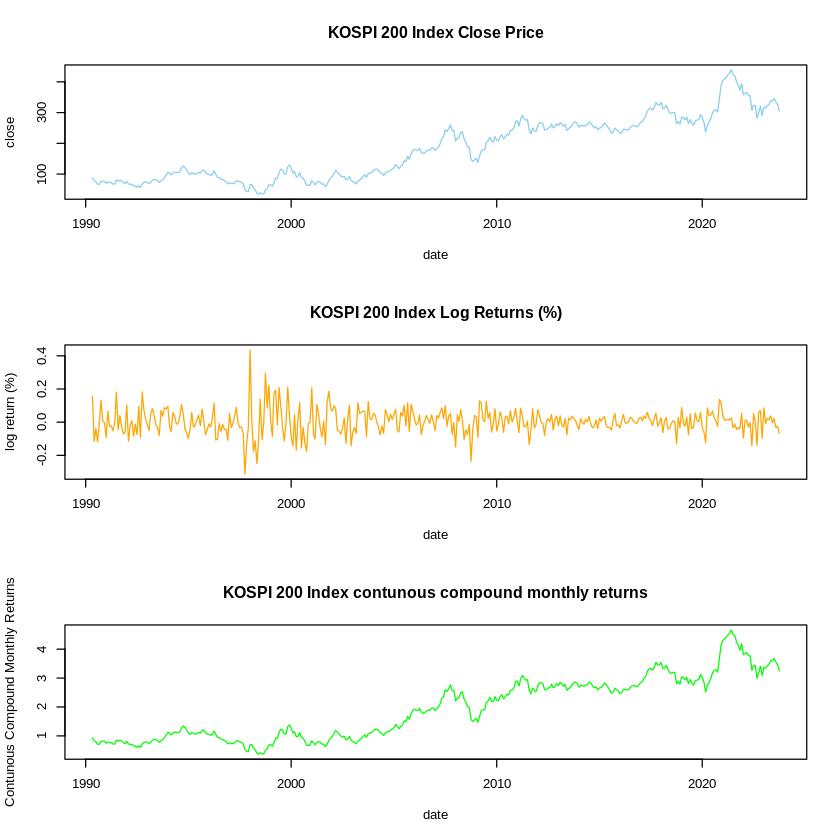

In [ ]:
train$date <- as.Date(train$date, '%Y-%m-%d')

par(mfrow=c(3,1))

plot(train$date,
     train$close,
     main='KOSPI 200 Index Close Price',
     xlab='date',
     ylab='close',
     type='l',
     col='skyblue')

plot(train$date,
     train$log_returns,
     main='KOSPI 200 Index Log Returns (%)',
     xlab='date',
     ylab='log return (%)',
     type='l',
     col='orange')

plot(train$date,
     train$contunous_compound,
     main='KOSPI 200 Index contunous compound monthly returns',
     xlab='date',
     ylab='Contunous Compound Monthly Returns',
     type='l',
     col='green')

## 포트폴리오 성과

In [ ]:
# sharpe.ratio <- mean(train$log_returns)/sd(train$log_returns)*sqrt(12)
# cumulative <- cumprod(1 + train$log_returns/100)-1
# cumulative <- cumulative[length(cumulative)]

# sprintf('Sharpe Ratio : %g', sharpe.ratio) # 변동성 대비 수익률
# sprintf('Cumulative Return : %g', cumulative) # 누적 수익률

## 통계 검정

### 정규성 검정

- Sharpe Test
- H0 : 데이터는 정규분포를 따른다

- p-value < 0.05 : H0 기각 => 정규분포를 안 따름
- 다른 통계 검정 수행 필요

In [ ]:
library(fBasics)

normalTest(train$log_returns, method='sw')


Attaching package: ‘fBasics’


The following object is masked from ‘package:psych’:

    tr





Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9601
  P VALUE:
    5.509e-09 


### 평균 검정

- t-test
- H0 : mu == 0

- p-value > 0.05 : H0 채택

In [ ]:
t.test(train$log_returns/100,
       mu=0,
       alternative = 'two.sided',
       conf.level = 0.95)


	One Sample t-test

data:  train$log_returns/100
t = 0.92135, df = 401, p-value = 0.3574
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.964014e-05  1.095701e-04
sample estimates:
   mean of x 
3.496497e-05 


### 왜도 검정

- skewness test
- H0 : s == 0

- p-value > 0.05 : H0 채택
- S&P500 Index 투자로 얻은 월별 로그 수익률은 양이나 음수에 집중되어 있지 않다

In [ ]:
s1 <- skewness(train$log_returns)
n <- length(train$log_returns)
skew <- s1/sqrt(6/n)
#pnorm(skew)

pvalue <- 2*(1-pnorm(skew))
pvalue

[1] 0.001590777
attr(,"method")
[1] "moment"

### 첨도 검정

- kurtosis test
- H0 : k == 0

- p-value < 0.05 : H0 기각
- Leptokuritc
- S&P500 Index 투자로 얻은 월별 로그 수익률은 0%에 매우 가까운 경우가 많다

In [ ]:
k1 <- kurtosis(train$log_returns)
kurt <- (k1-3)/sqrt(24/n)
k1-3
#pnorm(kurt)

pval1 <- 2*(1-pnorm(kurt))
pval1

[1] 0.6921065
attr(,"method")
[1] "excess"

[1] 0.004617576
attr(,"method")
[1] "excess"

### 자기 상관 검정

- Ljung-Box test
- H0 : corr1, corr2, corr3 ... == 0

- p-value > 0.05 : H0 채택
- 과거 12개월의 수익률은 지금 수익률과 상관계수가 없다

In [ ]:
Box.test(train$log_returns,
         type='Ljung-Box',
         lag=12)


	Box-Ljung test

data:  train$log_returns
X-squared = 12.83, df = 12, p-value = 0.3815


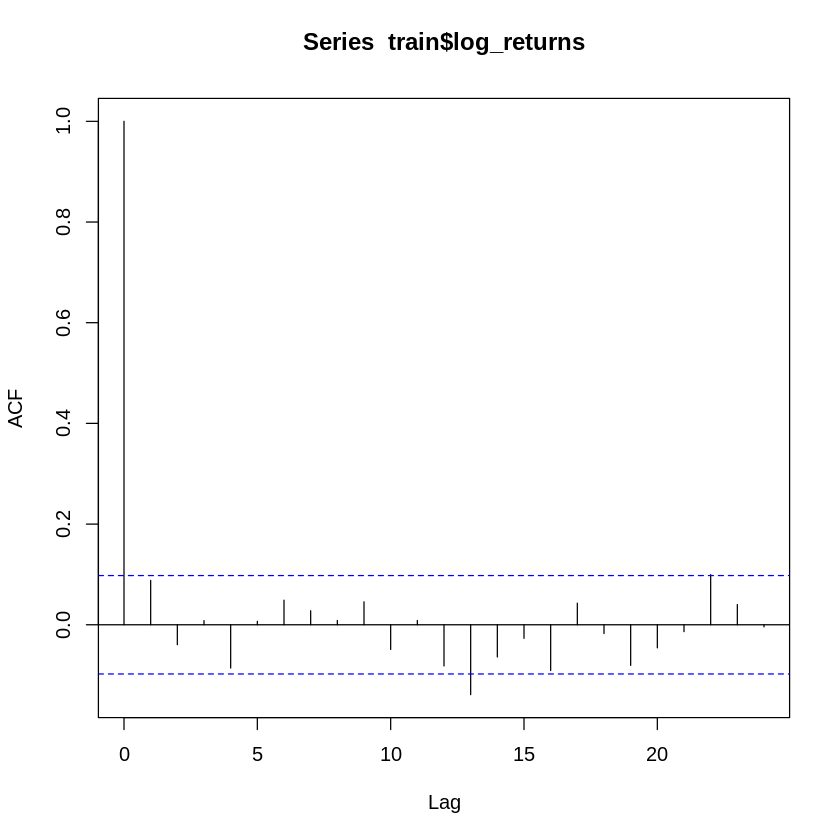

In [ ]:
acf.train <- acf(train$log_returns, lag=24)

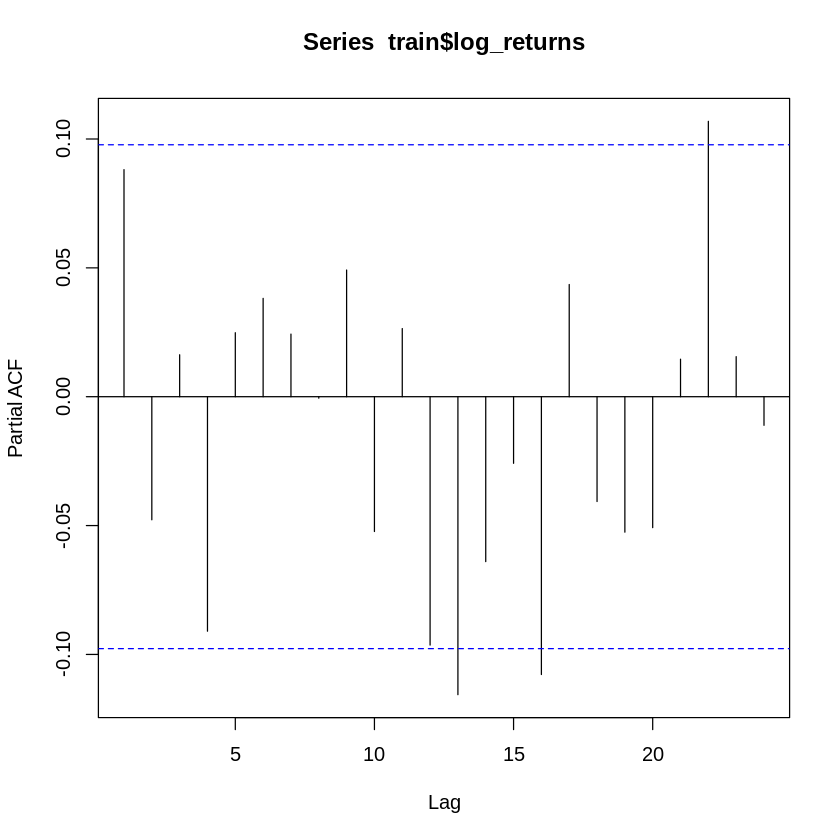

In [ ]:
pacf.train <- pacf(train$log_returns, lag=24)

### 단위근 검정

#### ADF

- Augmented Dickey-Fuller Test
- H0 : non-stationary & non-seasonly

- p-value < 0.05 : H0 기각 => S&P200 Index monthly returns은 정상성이다

In [ ]:
library(tseries)
adf.test(train$log_returns, k=24)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(train$log_returns, k = 24):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  train$log_returns
Dickey-Fuller = -4.8672, Lag order = 24, p-value = 0.01
alternative hypothesis: stationary


#### KPSS

- KPSS Test
- H0 : stationary & non-seasonly

- p-value > 0.05 : H0 채택

In [ ]:
# Trend를 고려
kpss.test(train$log_returns, null='Trend', lshort = TRUE)

Warning message in kpss.test(train$log_returns, null = "Trend", lshort = TRUE):
“p-value greater than printed p-value”



	KPSS Test for Trend Stationarity

data:  train$log_returns
KPSS Trend = 0.037179, Truncation lag parameter = 5, p-value = 0.1


In [ ]:
# Trend 비고려
kpss.test(train$log_returns, null='Level', lshort = TRUE)

Warning message in kpss.test(train$log_returns, null = "Level", lshort = TRUE):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  train$log_returns
KPSS Level = 0.037149, Truncation lag parameter = 5, p-value = 0.1


### Halloween Effect Performance

In [ ]:
may.oct

[1] -0.17334023 -0.72836824         NaN -0.18802194  0.28388613         NaN
 [7] -0.87827751         NaN         NaN -1.18970957         NaN  0.89766036
[13]         NaN  0.87456688         NaN         NaN -2.38105783 -0.50491899
[19]         NaN         NaN         NaN         NaN -0.50891235  0.02221648
[25]         NaN         NaN -0.05546960 -0.10268218  1.17853954         NaN
[31]         NaN         NaN         NaN

In [ ]:
compare <- train[-c(397:403),]

may.oct <- c()
nov.apr <- c()

for (i in 0:32){
    x <- i*12

    start <- 1 + x
    end <- 12 + x

    preiod <-compare[start:end, ]
    preiod$year <- substr(preiod[,1], 1,4)
    preiod$month <- substr(preiod[,1], 6,7)

    may_to_oct <- subset(preiod, as.numeric(month) %in% c(5, 6, 7, 8, 9, 10))
    average_returns_may_to_oct <- log(may_to_oct$close[6]/may_to_oct$close[1])

    nov_to_apr <- subset(preiod, as.numeric(month) %in% c(11, 12, 1, 2, 3, 4))
    average_returns_nov_to_apr <- log(nov_to_apr$close[6]/nov_to_apr$close[1])

    may.oct[i+1] <- average_returns_may_to_oct
    nov.apr[i+1] <- average_returns_nov_to_apr

    }

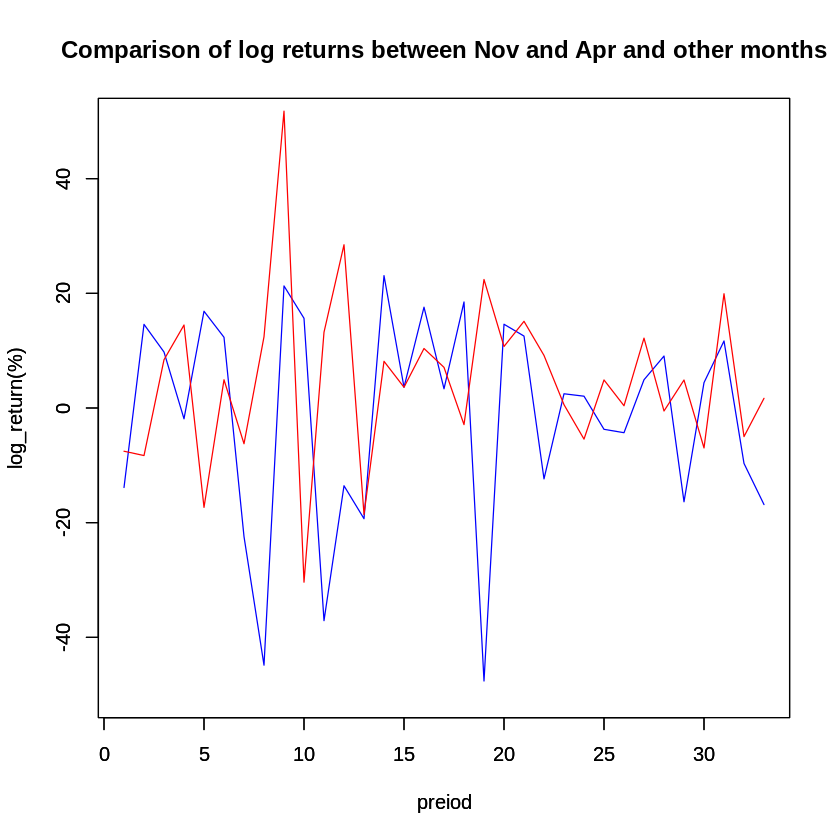

In [ ]:
plot(may.oct*100, type='l', col='blue', ylab='log_return(%)', xlab='preiod', ylim=c(-50, 50), main='Comparison of log returns between Nov and Apr and other months')
par(new=TRUE)
plot(nov.apr*100,, type='l', col='red', ylab='log_return(%)', xlab='preiod', ylim=c(-50, 50))

In [ ]:
statistic <- describe(may.oct)[c('n', 'mean', 'median', 'sd',
                                           'min', 'max', 'skew', 'kurtosis')]

names(statistic) <- c('n', 'mean', 'median', 'sd',
                      'min', 'max', 'skew', 'excess_kurtosis')

statistic['excess_kurtosis'] <- c(statistic$excess_kurtosis-3)

statistic

,n,mean,median,sd,min,max,skew,excess_kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,33,-0.01377013,0.03352333,0.185181,-0.476171,0.2308377,-0.8758972,-3.007849


In [ ]:
statistic <- describe(nov.apr)[c('n', 'mean', 'median', 'sd',
                                           'min', 'max', 'skew', 'kurtosis')]

names(statistic) <- c('n', 'mean', 'median', 'sd',
                      'min', 'max', 'skew', 'excess_kurtosis')

statistic['excess_kurtosis'] <- c(statistic$excess_kurtosis-3)

statistic

,n,mean,median,sd,min,max,skew,excess_kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,33,0.04719932,0.04892154,0.147882,-0.3038051,0.5177341,0.5104637,-1.207001


In [ ]:
geometric.mean(may.oct+1)
geometric.mean(nov.apr+1)

[1] 0.9663234

[1] 1.037169

In [ ]:
mean(may.oct*100)
mean(nov.apr*100)

[1] -1.377013

[1] 4.719932

In [ ]:
c <- 0
for (i in 1:length(may.oct)){
  if (may.oct[i]<nov.apr[i]){
    c <- c + 1
  }
}

c

[1] 19

In [ ]:
result <- t.test(nov.apr, may.oct, alternative = 'greater')

cat("p-value:", result$p.value, "\n")
cat("통계량:", result$statistic, "\n")

p-value: 0.07228624 
통계량: 1.477922 


In [ ]:
buy.hold <- c()
halloween <- c()

for (i in 0:32){
    x <- i*12
    start <- 1 + x
    end <- 12 + x

    preiod <-compare[start:end, ]
    preiod$year <- substr(preiod[,1], 1,4)
    preiod$month <- substr(preiod[,1], 6,7)

    buy.hold.returns <- log(preiod$close[12]/preiod$close[1])
    buy.hold[i+1] <- buy.hold.returns

    nov_to_apr <- subset(preiod, as.numeric(month) %in% c(11, 12, 1, 2, 3, 4))
    halloween.returns <- log(nov_to_apr$close[6]/nov_to_apr$close[1])
    halloween[i+1] <- halloween.returns
    }

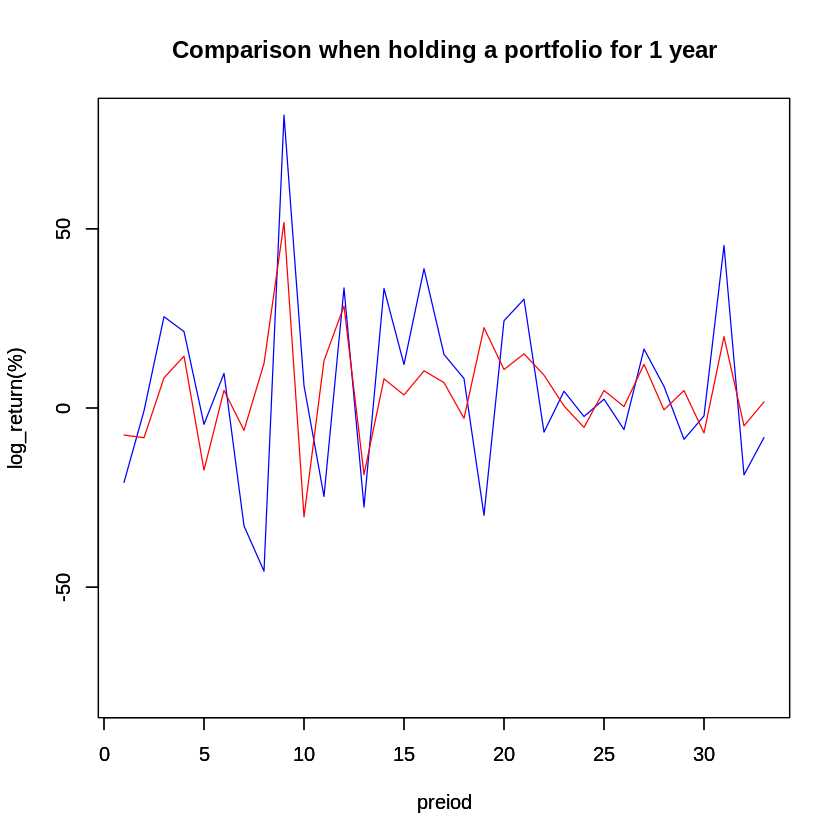

In [ ]:
plot(buy.hold*100,, type='l', col='blue', ylab='log_return(%)', xlab='preiod', ylim=c(-80, 80), main='Comparison when holding a portfolio for 1 year')
par(new=TRUE)
plot(halloween*100,, type='l', col='red', ylab='log_return(%)', xlab='preiod', ylim=c(-80, 80))

In [ ]:
geometric.mean(buy.hold+1)
geometric.mean(halloween+1)

[1] 1.022282

[1] 1.037169

In [ ]:
statistic <- describe(buy.hold)[c('n', 'mean', 'median', 'sd',
                                           'min', 'max', 'skew', 'kurtosis')]

names(statistic) <- c('n', 'mean', 'median', 'sd',
                      'min', 'max', 'skew', 'excess_kurtosis')

statistic['excess_kurtosis'] <- c(statistic$excess_kurtosis-3)

statistic

,n,mean,median,sd,min,max,skew,excess_kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,33,0.05313931,0.04670997,0.2594551,-0.4554212,0.8174921,0.5110115,-2.436955


In [ ]:
statistic <- describe(halloween)[c('n', 'mean', 'median', 'sd',
                                           'min', 'max', 'skew', 'kurtosis')]

names(statistic) <- c('n', 'mean', 'median', 'sd',
                      'min', 'max', 'skew', 'excess_kurtosis')

statistic['excess_kurtosis'] <- c(statistic$excess_kurtosis-3)

statistic

,n,mean,median,sd,min,max,skew,excess_kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,33,0.04719932,0.04892154,0.147882,-0.3038051,0.5177341,0.5104637,-1.207001


In [ ]:
c <- 0
for (i in 1:length(buy.hold)){
  if (buy.hold[i]<halloween[i]){
    c <- c + 1
  }
}

c/length(buy.hold)

[1] 0.3636364

In [ ]:
result <- t.test(halloween, buy.hold, alternative = 'greater')

cat("p-value:", result$p.value, "\n")
cat("통계량:", result$statistic, "\n")

p-value: 0.545259 
통계량: -0.11426 


In [ ]:
t.test(halloween, buy.hold, alternative = 'greater')


	Welch Two Sample t-test

data:  halloween and buy.hold
t = -0.11426, df = 50.807, p-value = 0.5453
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.09303851         Inf
sample estimates:
 mean of x  mean of y 
0.04719932 0.05313931 


### Modeling

- 모델 적합성 평가 => 잔차 분석
    - 정상성 검정
    - 정규성 검정
    - 등분산성 검정
    - 자기상관성 검정
- 좋은 모델 : AIC, BIC, log likehood

In [ ]:
library(lubridate)

train$halloween <- ifelse(month(train$date) >= 5 & month(train$date) <= 10, 0, 1)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
result <- data.frame(train)[120:nrow(train), ]

coefficient <- c()
l95 <- c()
u95 <- c()
t.value <- c()
p.value <- c()

for (i in 0:282){

  start = 1 + i
  end = 120 + i
  preiod_halloween<-train[start:end,]
  model <- lm(contunous_compound ~ halloween, data = preiod_halloween)
  #print(coef(model)[-1])
  #print(confint(model, level = 0.95)[2,][1])

  coefficient[start] <- coef(model)[-1]
  l95[start] <- confint(model, level = 0.95)[2,][1]
  u95[start] <- confint(model, level = 0.95)[2,][2]
  t.value[start] <- coef(summary(model))[2, "t value"]
  p.value[start] <- coef(summary(model))[2, 'Pr(>|t|)']

}

result$coef <- coefficient
result$l95 <- l95
result$u95 <- u95
result$t_value <- t.value
result$p_value <- p.value

In [ ]:
result

,date,close,log_returns,contunous_compound,halloween,coef,l95,u95,t_value,p_value
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
284,2000-04-01,91.21,-0.169244426,0.9697002,1,0.022428946,-0.06045075,0.10530864,0.5359023,0.5930348
283,2000-05-01,92.74,0.016635339,0.9859664,0,0.021530583,-0.06142106,0.10448223,0.5139912,0.6082193
282,2000-06-01,104.43,0.118717112,1.1102488,0,0.016856262,-0.06649939,0.10021191,0.4004526,0.6895473
281,2000-07-01,89.35,-0.155955749,0.9499256,0,0.014343681,-0.06903013,0.09771749,0.3406872,0.7339448
280,2000-08-01,86.54,-0.031954507,0.9200510,0,0.010838826,-0.07238513,0.09406278,0.2579044,0.7969299
279,2000-09-01,76.37,-0.125016786,0.8119286,0,0.009157275,-0.07391936,0.09223391,0.2182792,0.8275887
278,2000-10-01,64.00,-0.176706866,0.6804168,0,0.011340279,-0.07195426,0.09463482,0.2696076,0.7879331
277,2000-11-01,63.48,-0.008158188,0.6748884,1,0.008976540,-0.07457055,0.09252363,0.2127662,0.8318765
276,2000-12-01,63.35,-0.002049989,0.6735063,1,0.006626976,-0.07716937,0.09042332,0.1566085,0.8758211



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


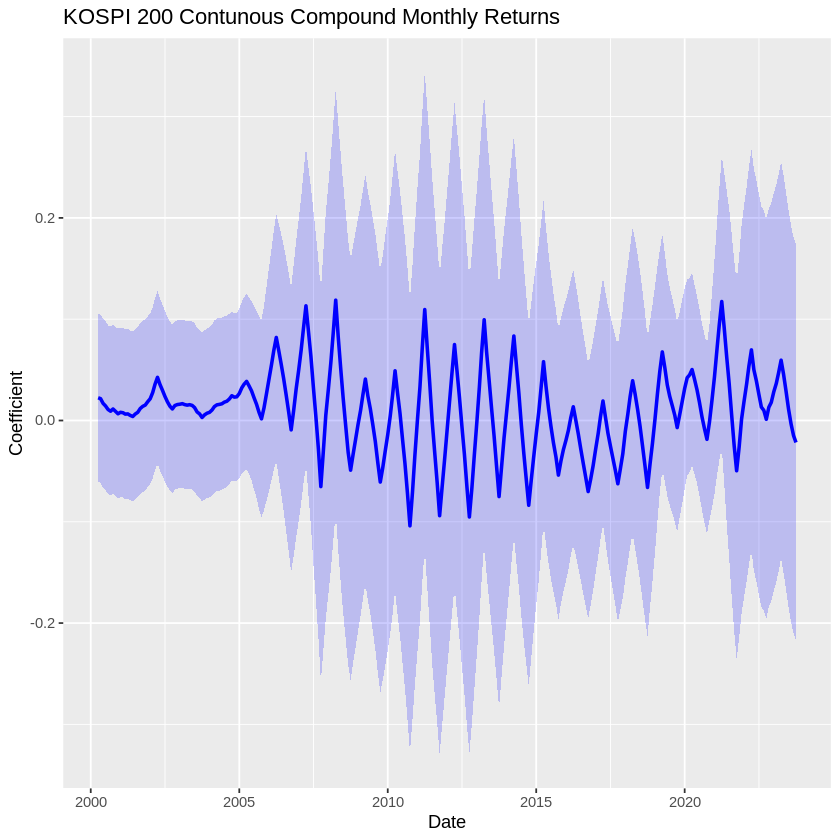

In [ ]:
# 그래프 생성
library(ggplot2)

ggplot(result, aes(x = date, y = coef)) +
  geom_line(color = "blue", size = 1) +
  geom_ribbon(aes(ymin = l95, ymax = u95), fill = "blue", alpha = 0.2) +
  labs(title = "KOSPI 200 Contunous Compound Monthly Returns",
       x = "Date",
       y = "Coefficient")

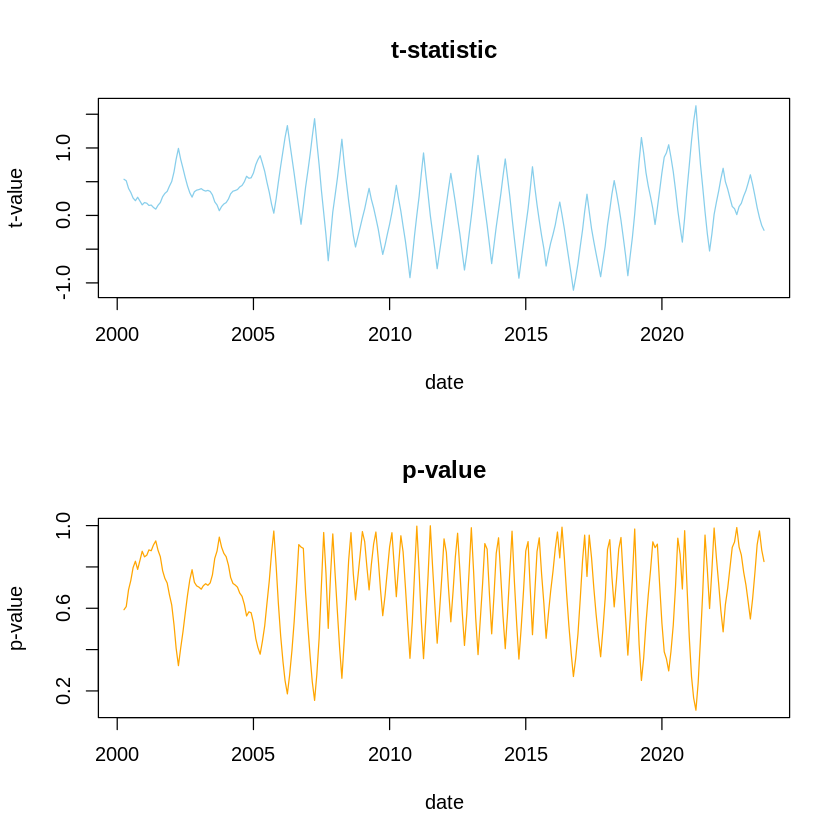

In [ ]:
result$date <- as.Date(result$date, '%Y-%m-%d')

par(mfrow=c(2,1))

plot(result$date,
     result$t_value,
     main='t-statistic',
     xlab='date',
     ylab='t-value',
     type='l',
     col='skyblue')

plot(result$date,
     result$p_value,
     main='p-value',
     xlab='date',
     ylab='p-value',
     type='l',
     col='orange')

In [ ]:
result <- data.frame(train)[120:nrow(train), ]

coefficient <- c()
l95 <- c()
u95 <- c()
t.value <- c()
p.value <- c()

for (i in 0:282){

  start = 1 + i
  end = 120 + i
  preiod_halloween<-train[start:end,]
  model <- lm(log_returns ~ halloween, data = preiod_halloween)
  #print(coef(model)[-1])
  #print(confint(model, level = 0.95)[2,][1])

  coefficient[start] <- coef(model)[-1]
  l95[start] <- confint(model, level = 0.95)[2,][1]
  u95[start] <- confint(model, level = 0.95)[2,][2]
  t.value[start] <- coef(summary(model))[2, "t value"]
  p.value[start] <- coef(summary(model))[2, 'Pr(>|t|)']

}

result$coef <- coefficient
result$l95 <- l95
result$u95 <- u95
result$t_value <- t.value
result$p_value <- p.value

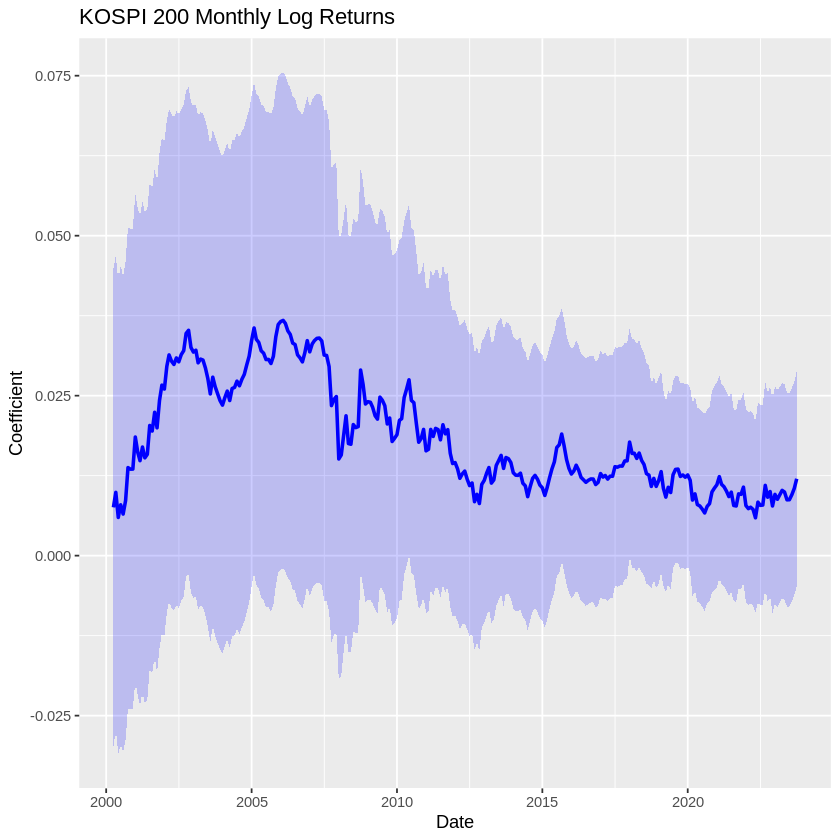

In [ ]:
# 그래프 생성
ggplot(result, aes(x = date, y = coef)) +
  geom_line(color = "blue", size = 1) +
  geom_ribbon(aes(ymin = l95, ymax = u95), fill = "blue", alpha = 0.2) +
  labs(title = "KOSPI 200 Monthly Log Returns",
       x = "Date",
       y = "Coefficient")

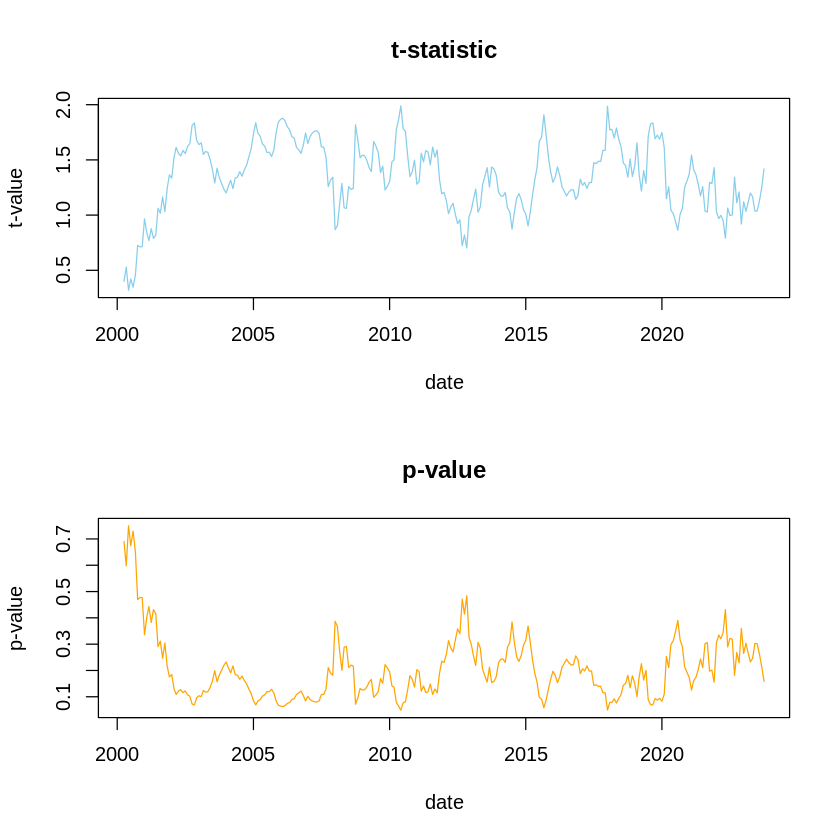

In [ ]:
result$date <- as.Date(result$date, '%Y-%m-%d')

par(mfrow=c(2,1))

plot(result$date,
     result$t_value,
     main='t-statistic',
     xlab='date',
     ylab='t-value',
     type='l',
     col='skyblue')

plot(result$date,
     result$p_value,
     main='p-value',
     xlab='date',
     ylab='p-value',
     type='l',
     col='orange')

In [ ]:
nrow(train)

[1] 402

In [ ]:
model <- lm(log_returns ~ halloween, data = train)
summary(model)


Call:
lm(formula = log_returns ~ halloween, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30999 -0.04088 -0.00013  0.03996  0.42440 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.003933   0.005308  -0.741   0.4591  
halloween    0.015085   0.007563   1.995   0.0468 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07581 on 400 degrees of freedom
Multiple R-squared:  0.009849,	Adjusted R-squared:  0.007373 
F-statistic: 3.979 on 1 and 400 DF,  p-value: 0.04676
